### 4ª Imersão de Dados Alura
#### Aula 2: Tratamento de dados e primeiros gráficos



In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
df = pd.read_csv(url)
df.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


In [3]:
df.Valor[0]

'R$ 7.000.000'

In [4]:
df.Valor[0].split()

['R$', '7.000.000']

In [5]:
df.Valor.str.split(expand=True)

,0,1,2
0,R$,7.000.000,None
1,R$,3.700.000,None
2,R$,380.000,None
3,R$,685.000,None
4,R$,540.000,None
...,...,...,...
10003,R$,665.000,None
10004,R$,2.300.000,None
10005,R$,1.050.000,None
10006,R$,2.200,/Mês


In [6]:
df.Valor.str.split(expand=True)[0].unique() 

array(['R$'], dtype=object)

In [7]:
df.Valor.str.split(expand=True)[1].unique() 

array(['7.000.000', '3.700.000', '380.000', ..., '553.000', '951.000',
       '2.200'], dtype=object)

In [8]:
df.Valor.str.split(expand=True)[2].unique() 

array([None, '/Mês', '/Ano', '/Dia'], dtype=object)

In [9]:
df[["Moeda", "Valor_Anuncio", "Tipo_Anuncio"]] = df["Valor"].str.split(expand=True)
df.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_Anuncio,Tipo_Anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None


In [10]:
df[df["Tipo_Anuncio"].isnull()]["Tipo_Anuncio"].unique()


array([None], dtype=object)

In [11]:
df_vendas = df[df["Tipo_Anuncio"].isnull()]
df_vendas.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_Anuncio,Tipo_Anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None


In [12]:
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rua            6107 non-null   object
 1   Bairro         9146 non-null   object
 2   Cidade         9156 non-null   object
 3   Metragem       9156 non-null   int64 
 4   Quartos        9156 non-null   int64 
 5   Banheiros      9156 non-null   int64 
 6   Vagas          9156 non-null   int64 
 7   Valor          9156 non-null   object
 8   Moeda          9156 non-null   object
 9   Valor_Anuncio  9156 non-null   object
 10  Tipo_Anuncio   0 non-null      object
dtypes: int64(4), object(7)
memory usage: 858.4+ KB


In [13]:
df_vendas["Valor_Anuncio"].str.replace(".", "").astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


0        7000000.0
1        3700000.0
2         380000.0
3         685000.0
4         540000.0
           ...    
10002    1500000.0
10003     665000.0
10004    2300000.0
10005    1050000.0
10007     270000.0
Name: Valor_Anuncio, Length: 9156, dtype: float64

In [14]:
df_vendas["Valor_Anuncio_Float"] = df_vendas["Valor_Anuncio"].str.replace(".", "").astype(float)
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rua                  6107 non-null   object 
 1   Bairro               9146 non-null   object 
 2   Cidade               9156 non-null   object 
 3   Metragem             9156 non-null   int64  
 4   Quartos              9156 non-null   int64  
 5   Banheiros            9156 non-null   int64  
 6   Vagas                9156 non-null   int64  
 7   Valor                9156 non-null   object 
 8   Moeda                9156 non-null   object 
 9   Valor_Anuncio        9156 non-null   object 
 10  Tipo_Anuncio         0 non-null      object 
 11  Valor_Anuncio_Float  9156 non-null   float64
dtypes: float64(1), int64(4), object(7)
memory usage: 929.9+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


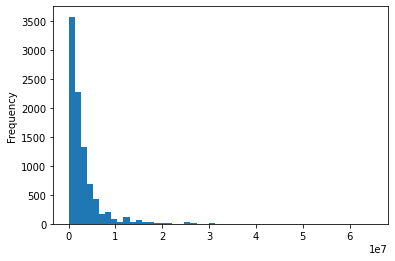

In [15]:
df_vendas["Valor_Anuncio_Float"].plot.hist(bins= 50)

In [16]:
df_vendas.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_Anuncio_Float
count,9156.000000,9156.000000,9156.000000,9156.000000,9.156000e+03
mean,434.416230,3.446811,3.797073,3.960135,3.052203e+06
std,7856.422978,1.048944,1.967873,2.601022,3.944208e+06
min,10.000000,1.000000,1.000000,1.000000,1.300000e+04
25%,168.000000,3.000000,2.000000,2.000000,8.900000e+05
50%,276.000000,3.000000,4.000000,4.000000,1.800000e+06
75%,450.000000,4.000000,5.000000,5.000000,3.500000e+06
max,750000.000000,16.000000,40.000000,50.000000,6.500000e+07


In [17]:
pd.set_option("display.precision", 2)
pd.set_option("display.float_format", lambda x: '%.2f' % x)
df_vendas.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_Anuncio_Float
count,9156.00,9156.00,9156.00,9156.00,9156.00
mean,434.42,3.45,3.80,3.96,3052202.96
std,7856.42,1.05,1.97,2.60,3944208.19
min,10.00,1.00,1.00,1.00,13000.00
25%,168.00,3.00,2.00,2.00,890000.00
50%,276.00,3.00,4.00,4.00,1800000.00
75%,450.00,4.00,5.00,5.00,3500000.00
max,750000.00,16.00,40.00,50.00,65000000.00


In [18]:
df_vendas[["Rua", "Bairro", "Cidade"]].describe()

,Rua,Bairro,Cidade
count,6107,9146,9156
unique,3006,697,1
top,Rua Alberto Faria,Alto de Pinheiros,São Paulo
freq,24,369,9156


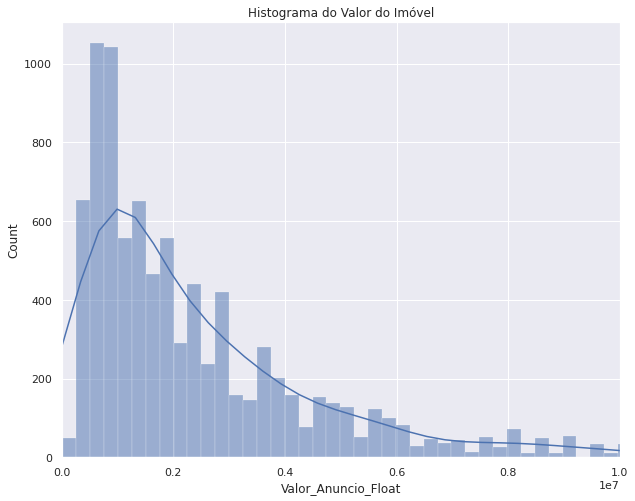

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
plt.figure(figsize=(10, 8))
ax = sns.histplot(data=df_vendas, x="Valor_Anuncio_Float", kde=True)
ax.set_title("Histograma do Valor do Imóvel")
plt.xlim(-50, 10000000)
plt.show()

# Desafios
 - **Criar uma escala de valores em milhoes**
 

In [20]:
# Vamos apenas adicionar uma nova coluna com valores dentro dessa escala
df_vendas["Valor_em_Milhoes"] = df_vendas["Valor_Anuncio_Float"].apply(lambda x: x/1000000.0)
df_vendas.head()


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_Anuncio,Tipo_Anuncio,Valor_Anuncio_Float,Valor_em_Milhoes
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.00,7.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.00,3.70
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.00,0.38
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.00,0.69
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.00,0.54


- **Deixar o gráfico do histograma de valores legível alterar (labels, eixos, cores etc)**



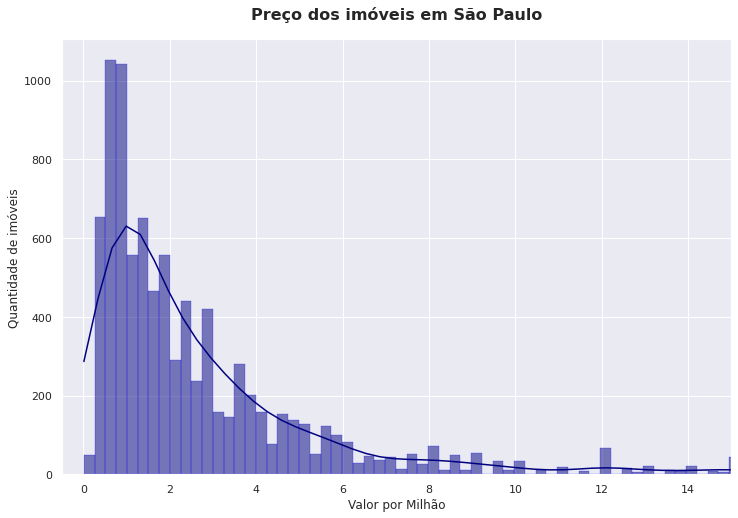

In [21]:
#Vamos adicionar novas configurações ao grafico
sns.set()
plt.figure(figsize=(12, 8))
ax = ax = sns.histplot(
    data = df_vendas, 
    x = 'Valor_em_Milhoes',
    kde = True, 
    edgecolor = 'blue',
    color = 'navy'
)
ax.set_title("Preço dos imóveis em São Paulo", 
             fontsize=16,
             fontweight="bold",
             pad=20)

ax.set(xlabel="Valor por Milhão", 
       ylabel="Quantidade de imóveis")

plt.xlim(-0.5, 15)
plt.show()

 - Preço do metro quadrado por bairro


In [22]:
# Vamos primeiramente criar o preço por metragem de cada imóvel:
df_vendas["Valor_m2"] = df_vendas["Valor_Anuncio_Float"]/ df["Metragem"]
df_vendas.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_Anuncio,Tipo_Anuncio,Valor_Anuncio_Float,Valor_em_Milhoes,Valor_m2
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.00,7.00,7000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.00,3.70,7459.68
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.00,0.38,3040.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.00,0.69,2209.68
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.00,0.54,5400.00


- **Gráfico do preço m² por bairro. Explorar as bilbiotecas e visualizações e também colocar conclusões sobre os gráficos**

 Para isso, vamos utilizar a função describe e para cada bairro, calcularemos a média do preço por metro quadrado. Para facilitar a visualização dos dados, vamos elencar os 10 bairros com o maior preço por metro quadrado e depois os 10 bairros com menor preço. Colocaremos então esses valores em gráficos

In [23]:
df_vendas.groupby("Bairro")["Metragem"].describe()["mean"].sort_values(ascending=False).head(10)

Bairro
Sítio Represa                37000.00
Vila Castelo                  2850.00
Jardim Guedala                2754.14
Jardim das Camélias           1700.00
Chácara Flora                 1251.44
Jardim Sílvia (Zona Oeste)    1228.96
Retiro Morumbi                1136.39
Vila Aurora (Zona Norte)      1082.50
Paineiras do Morumbi           754.83
Jardim Everest                 734.62
Name: mean, dtype: float64

In [24]:
df_scatter_max = pd.DataFrame(df_vendas.groupby("Bairro")["Valor_m2"].describe()["mean"].sort_values(ascending=False).head(10))
df_scatter_max

,mean
Bairro,
Vila Guaca,80000.00
Jardim América,24088.57
Jardim Ampliação,20051.04
Jardim Europa,19962.69
Vila Nova Conceição,17614.03
Jardim Teresa,17465.56
Jardim Luzitânia,16568.76
Jardim Paulista,16087.45
Jardim Paulistano,14995.06


In [25]:
df_scatter_min = pd.DataFrame(df_vendas.groupby("Bairro")["Valor_m2"].describe()["mean"].sort_values(ascending=True).head(10))
df_scatter_min

,mean
Bairro,
Sítio Represa,78.38
Jardim Vera Cruz(Zona Leste),544.76
Vila Aurea,906.59
Jardim Itapemirim,1054.50
Jardim Brasília (Zona Leste),1055.01
Guaianazes,1183.04
Parque Santa Cecília,1200.00
Jardim Fernandes,1333.33
Jardim Santa Fé (Zona Sul),1357.91


Para plotar os dois gráficos, utilizaremos a combinação dos métodos disponíveis no `matplotlib.pyplot` e no `seaborn` para criar um grid de gráficos:

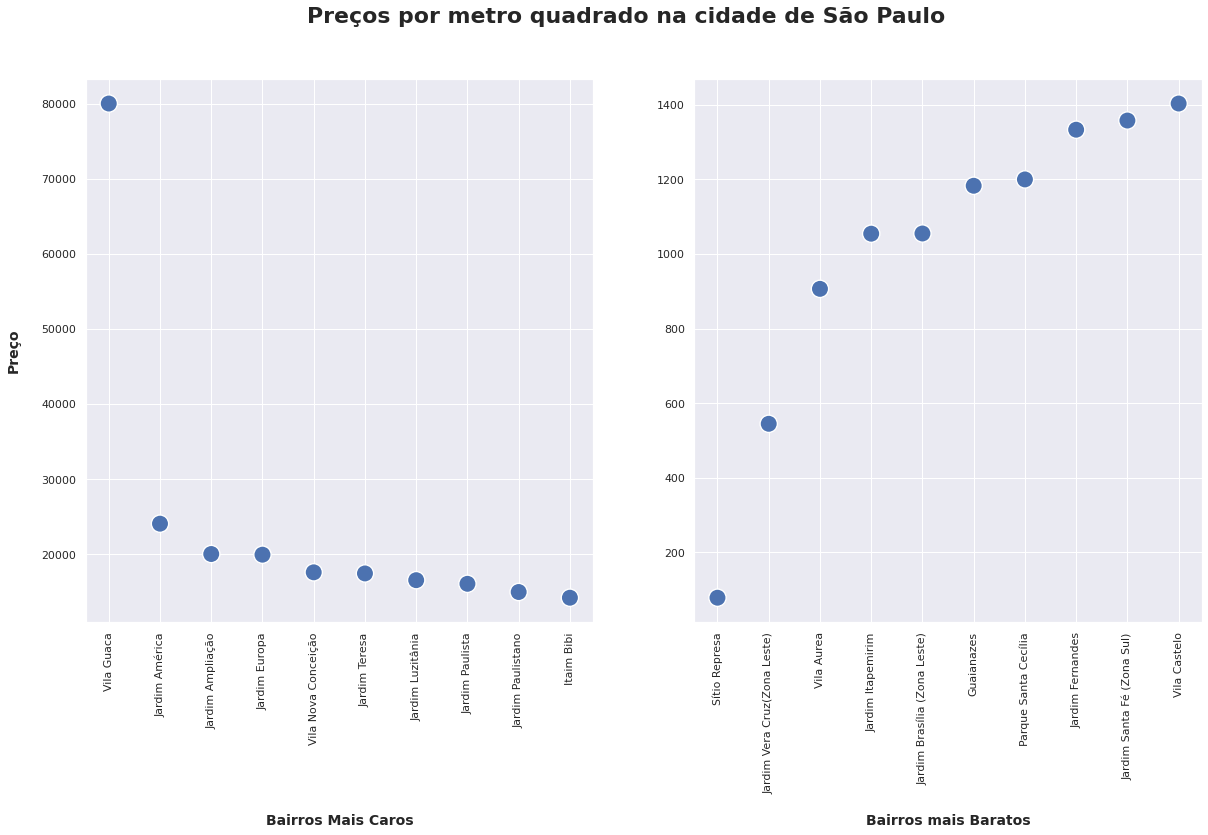

In [26]:
fig, (ax1, ax2) =  plt.subplots(1, 2, figsize=(20, 10))
plt.subplot(1, 2, 1)
fig.suptitle("Preços por metro quadrado na cidade de São Paulo",
             fontweight="bold",
             fontsize=22)
sns.scatterplot(data=df_scatter_max, s=300, legend=False)
plt.xlabel(xlabel="Bairros Mais Caros", 
           fontsize=14, 
           fontweight="bold",
           labelpad=20)
plt.ylabel(ylabel="Preço",
           fontsize=14, 
           fontweight="bold",
           labelpad=20)
plt.xticks(rotation=90)
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_scatter_min, s=300, legend=False)
plt.xlabel(xlabel="Bairros mais Baratos", 
           fontsize=14, 
           fontweight="bold",
           labelpad=20)
plt.xticks(rotation=90)
fig.align_xlabels()
plt.show()


Aqui conseguimos notar que alguns pontos saltam a atenção. A média do bairro Vila Guaca é muito maior do que o restante dos bairros, mesmo se tratando de bairros caros. Provavelmente temos algum valor de imóvel neste bairro que deve afetar o calculo da média. No caso dos bairros mais baratos, chama a atenção o Sítio Represa. Pelo nome, intuitivamente podemos supor que trata-se de uma área de sítio, portanto, com uma metragem muito grande, o que pode fazer o valor médio cair, porém, não podemos esperar um imóvel de preço baixo. Para tirar melhores conclusões sobre isso, vamos explorar alguns boxplots no desafio abaixo:


 
 - **Pesquisar uma visualização para analisar os quartis, medianas e outliers**

In [27]:
# Vamos plotar o boxplot da distribuição de preços dos imóveis na Vila Guaca:
df_garcia = df_vendas[df_vendas["Bairro"] == "Vila Guaca"]
df_garcia

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_Anuncio,Tipo_Anuncio,Valor_Anuncio_Float,Valor_em_Milhoes,Valor_m2
9603,Rua Pestana,Vila Guaca,São Paulo,10,3,2,2,R$ 800.000,R$,800.000,None,800000.00,0.80,80000.00


Já conseguimos concluir logo de cara que não se trata nem de um valor que afeta a média. Na verdade temos apenas um imóvel neste bairro com um preço exorbitante. Ele acaba sendo um outlier em relação aos preços de outros bairros mas não conseguimos inferir isso em relação ao próprio bairro Vila Guaca, por não termos mais imóveis para analisar. Vamos então apenas verificar como é a distribuição de preços do segundo bairro mais caro, Jardim America:

In [28]:
df_america = df_vendas[df_vendas["Bairro"] == "Jardim América"]
df_america.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_Anuncio,Tipo_Anuncio,Valor_Anuncio_Float,Valor_em_Milhoes,Valor_m2
67,Rua Bolívia,Jardim América,São Paulo,663,4,7,6,R$ 14.500.000,R$,14.500.000,None,14500000.00,14.50,21870.29
198,"Rua Bolívia, 200",Jardim América,São Paulo,1060,4,5,9,R$ 11.489.000,R$,11.489.000,None,11489000.00,11.49,10838.68
250,NaN,Jardim América,São Paulo,617,4,4,8,R$ 9.500.000,R$,9.500.000,None,9500000.00,9.50,15397.08
375,Rua Desembargador Vicente Penteado,Jardim América,São Paulo,410,4,6,3,R$ 5.200.000,R$,5.200.000,None,5200000.00,5.20,12682.93
662,Rua Panamá,Jardim América,São Paulo,950,4,4,6,R$ 26.000.000,R$,26.000.000,None,26000000.00,26.00,27368.42


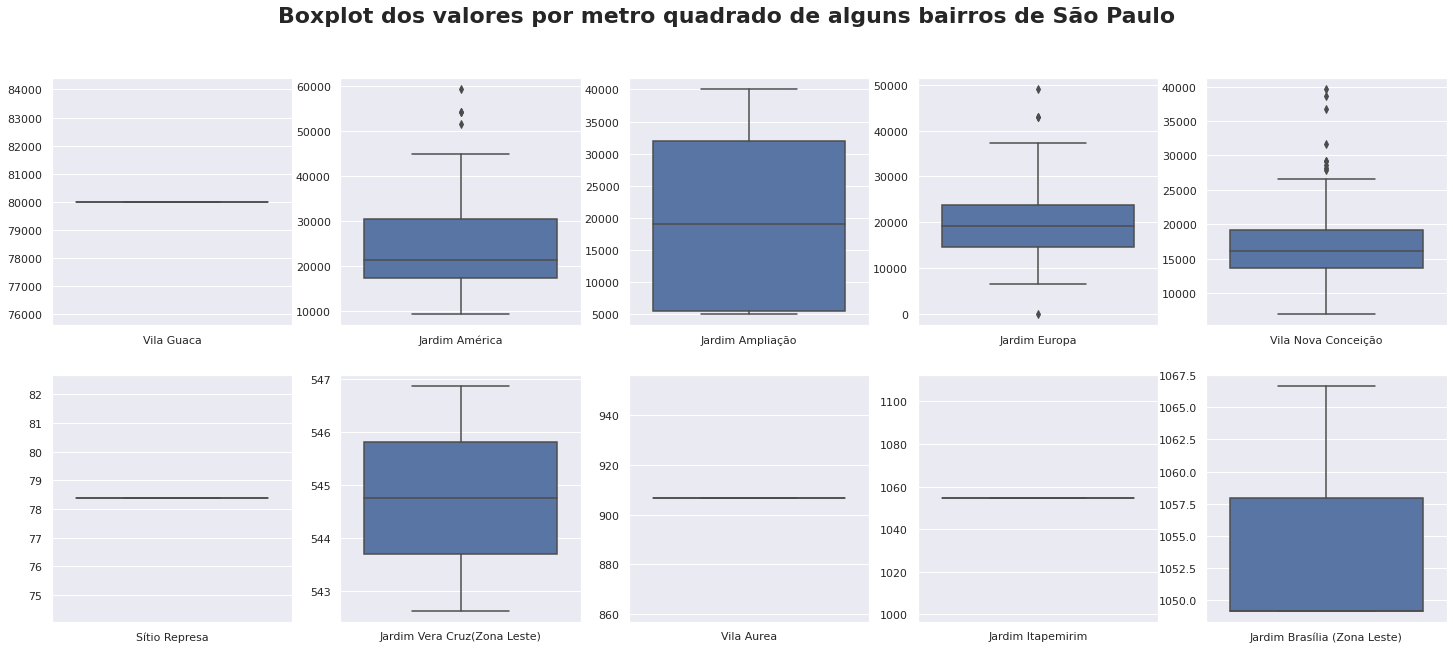

In [95]:
names_max = df_scatter_max.head(5).index.tolist()
names_min = df_scatter_min.head(5).index.tolist()

names = names_max
names.extend(names_min)

fig, axes = plt.subplots(2, 5, figsize=(25, 10))
index_name = 0
fig.suptitle("Boxplot dos valores por metro quadrado de alguns bairros de São Paulo", fontsize=22, fontweight="bold")
for i in range(0,2):
  for j in range(0,5):
    ax = sns.boxplot(y="Valor_m2", x="Bairro", data=df_vendas[df_vendas["Bairro"] == names[index_name]], orient="v", ax=axes[i][j])
    ax.set(xlabel=None)
    ax.set(ylabel=None)
    index_name += 1


Podemos notar através dos gráficos que dos cinco bairros mais caros, um deles tem apenas um imóvel, o mesmo acontece com o Sítio Represa, Vila Aurea e Jardim Itapemirim. Nos outros casos a distribuição de valores dos bairros Jardim Brasília, Jd. Vera Cruz e Jd. Ampliação não possuem outliers, ou seja, valores discrepantes, caso que acontece nos bairros Jd. América, Jd. Europa e Vila Nova Conceição. Novamente, o boxplot é um ótimo recurso para entendermos a distribuição de um determinado dado. 